In [66]:
#Code to plot burst intervals with the redshifts (1+z) on logarithmic scale.
import numpy as np
import pandas as pd
from astropy.io import ascii
from scipy.optimize import curve_fit
from matplotlib.pylab import plt


data=pd.read_excel("to_process_in_python.xlsx",sheet_name='Sheet1')    #Input data will be grb2.xlsx for those GRBs who have T90_raw>2 seconds
                                                      #and to_process_in_python.xlsx for all sampled GRBs (comprehensive analyis)


In [67]:
data

,GRB Name,Obs_ID,z,1+z,T90_raw(s),T90_raw_error,T50_raw(s),T50_raw_error,E1_obsframe(KeV),E2_obsframe(KeV),...,T50_(s),T50_error,T90_raw_1plusz,T50_raw_1plusz,T90_rest_error,T50_rest_error,T90_rest,T50_rest,T90_restt_error,T50_restt_error
0,180728A,850471,0.117,1.1170,8.688,0.321,2.464,0.035,125.330000,313.339302,...,1.824,0.230,7.777977,2.205909,0.287377,0.031334,4.726947,1.632945,1.966876,0.205909
1,60614,214805,0.127,1.1380,109.264,3.415,43.296,0.790,123.022847,307.557118,...,11.344,6.051,96.014060,38.045694,3.000879,0.694200,16.098418,9.968366,3.614236,5.317223
2,150727A,650530,0.313,1.3130,86.128,12.748,30.192,3.624,106.626047,266.565118,...,14.976,6.150,65.596344,22.994669,9.709063,2.760091,18.205636,11.405941,3.341965,4.683930
3,130427A,554620,0.34,1.3400,316.272,7.630,32.064,1.296,104.477612,261.194030,...,4.016,0.079,236.023881,23.928358,5.694030,0.967164,95.773134,2.997015,3.626119,0.058955
4,61021,234905,0.3463,1.3463,46.448,5.200,10.240,1.125,103.988710,259.971774,...,2.128,0.714,34.500483,7.606031,3.862438,0.835624,3.660403,1.580628,0.639531,0.530342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,60927,231362,5.6,6.6000,22.528,1.277,15.792,5.217,21.212121,53.030303,...,16.320,5.891,3.413333,2.392727,0.193485,0.790455,3.219394,2.472727,0.211364,0.892576
243,130606A,557589,5.913,6.9130,163.088,2.983,71.696,5.921,20.251700,50.629249,...,77.296,64.377,23.591494,10.371185,0.431506,0.856502,23.628526,11.181253,0.405757,9.312455
244,50904,153514,6.2,7.2000,179.500,10.300,85.400,7.600,19.444444,48.611111,...,87.216,8.845,24.930556,11.861111,1.430556,1.055556,26.075556,12.113333,1.981806,1.228472
245,140515A,599037,6.32,7.3200,23.456,2.048,9.776,5.341,19.125683,47.814208,...,10.048,5.955,3.204372,1.335519,0.279781,0.729645,3.160656,1.372678,0.267486,0.813525


In [68]:
#data=data[:28]

In [69]:
data.drop(["GRB Name"],axis=1,inplace=True)
data.drop(["Obs_ID"],axis=1,inplace=True)

data


,z,1+z,T90_raw(s),T90_raw_error,T50_raw(s),T50_raw_error,E1_obsframe(KeV),E2_obsframe(KeV),T90_(s),T90_error,T50_(s),T50_error,T90_raw_1plusz,T50_raw_1plusz,T90_rest_error,T50_rest_error,T90_rest,T50_rest,T90_restt_error,T50_restt_error
0,0.117,1.1170,8.688,0.321,2.464,0.035,125.330000,313.339302,5.280,2.197,1.824,0.230,7.777977,2.205909,0.287377,0.031334,4.726947,1.632945,1.966876,0.205909
1,0.127,1.1380,109.264,3.415,43.296,0.790,123.022847,307.557118,18.320,4.113,11.344,6.051,96.014060,38.045694,3.000879,0.694200,16.098418,9.968366,3.614236,5.317223
2,0.313,1.3130,86.128,12.748,30.192,3.624,106.626047,266.565118,23.904,4.388,14.976,6.150,65.596344,22.994669,9.709063,2.760091,18.205636,11.405941,3.341965,4.683930
3,0.34,1.3400,316.272,7.630,32.064,1.296,104.477612,261.194030,128.336,4.859,4.016,0.079,236.023881,23.928358,5.694030,0.967164,95.773134,2.997015,3.626119,0.058955
4,0.3463,1.3463,46.448,5.200,10.240,1.125,103.988710,259.971774,4.928,0.861,2.128,0.714,34.500483,7.606031,3.862438,0.835624,3.660403,1.580628,0.639531,0.530342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,5.6,6.6000,22.528,1.277,15.792,5.217,21.212121,53.030303,21.248,1.395,16.320,5.891,3.413333,2.392727,0.193485,0.790455,3.219394,2.472727,0.211364,0.892576
243,5.913,6.9130,163.088,2.983,71.696,5.921,20.251700,50.629249,163.344,2.805,77.296,64.377,23.591494,10.371185,0.431506,0.856502,23.628526,11.181253,0.405757,9.312455
244,6.2,7.2000,179.500,10.300,85.400,7.600,19.444444,48.611111,187.744,14.269,87.216,8.845,24.930556,11.861111,1.430556,1.055556,26.075556,12.113333,1.981806,1.228472
245,6.32,7.3200,23.456,2.048,9.776,5.341,19.125683,47.814208,23.136,1.958,10.048,5.955,3.204372,1.335519,0.279781,0.729645,3.160656,1.372678,0.267486,0.813525


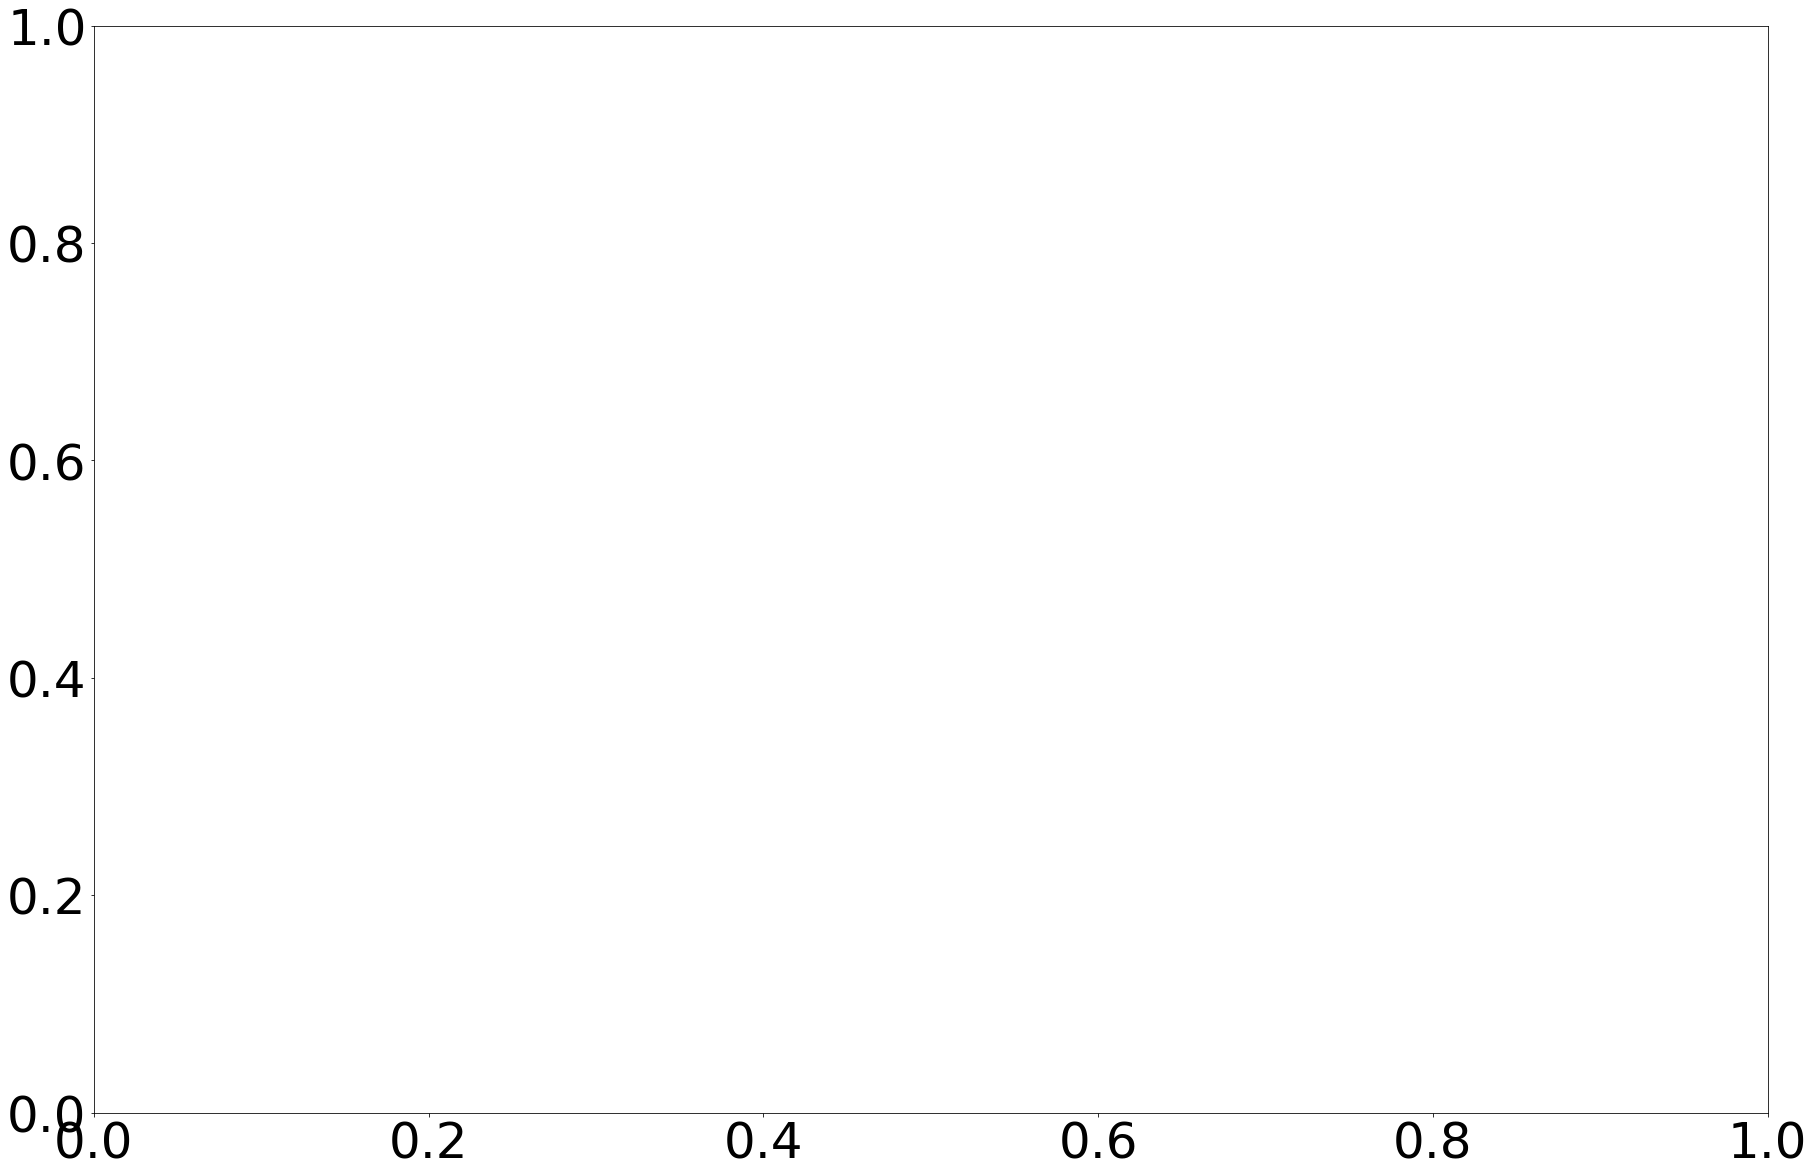

In [70]:
#Some Matplotlib settings
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
plt.rc('axes', labelsize='80')
plt.xticks(fontsize='50')
plt.yticks(fontsize='50')
rcParams['xtick.minor.size'] = 10
rcParams['xtick.minor.width'] = 5
rcParams['ytick.minor.size'] = 10
rcParams['ytick.labelsize'] = 40
rcParams['ytick.minor.width'] = 5
rcParams['xtick.labelsize'] = 30




x=(data['1+z'])  # variable z is really 1+z


#y_t90=(data['T90_(s)'])
y_t90_err=(data['T90_error'])


#y_t50=(data['T50_(s)'])
#y_t50_err=(data['T50_error'])




#y_t90_raw=(data['T90_raw(s)'])
#y_t90_raw_error=(data['T90_raw_error'])


#y_t50_raw=(data['T50_raw(s)'])
#y_t50_raw_error=(data['T50_raw_error'])


y_T90x_raw=(data['T90_raw(s)'])/(data['1+z'])

#y_T90x_raw=(data['T90_raw_1plusz'])
y_T90x_raw_error=(data['T90_rest_error'])

y_T50x_raw=(data['T50_raw_1plusz'])
y_T50x_raw_error=(data['T50_rest_error'])

y_T90_rest=(data['T90_rest'])
y_T90_rest_error=(data['T90_restt_error'])

y_T50_rest=(data['T50_rest'])
y_T50_rest_error=(data['T50_restt_error'])

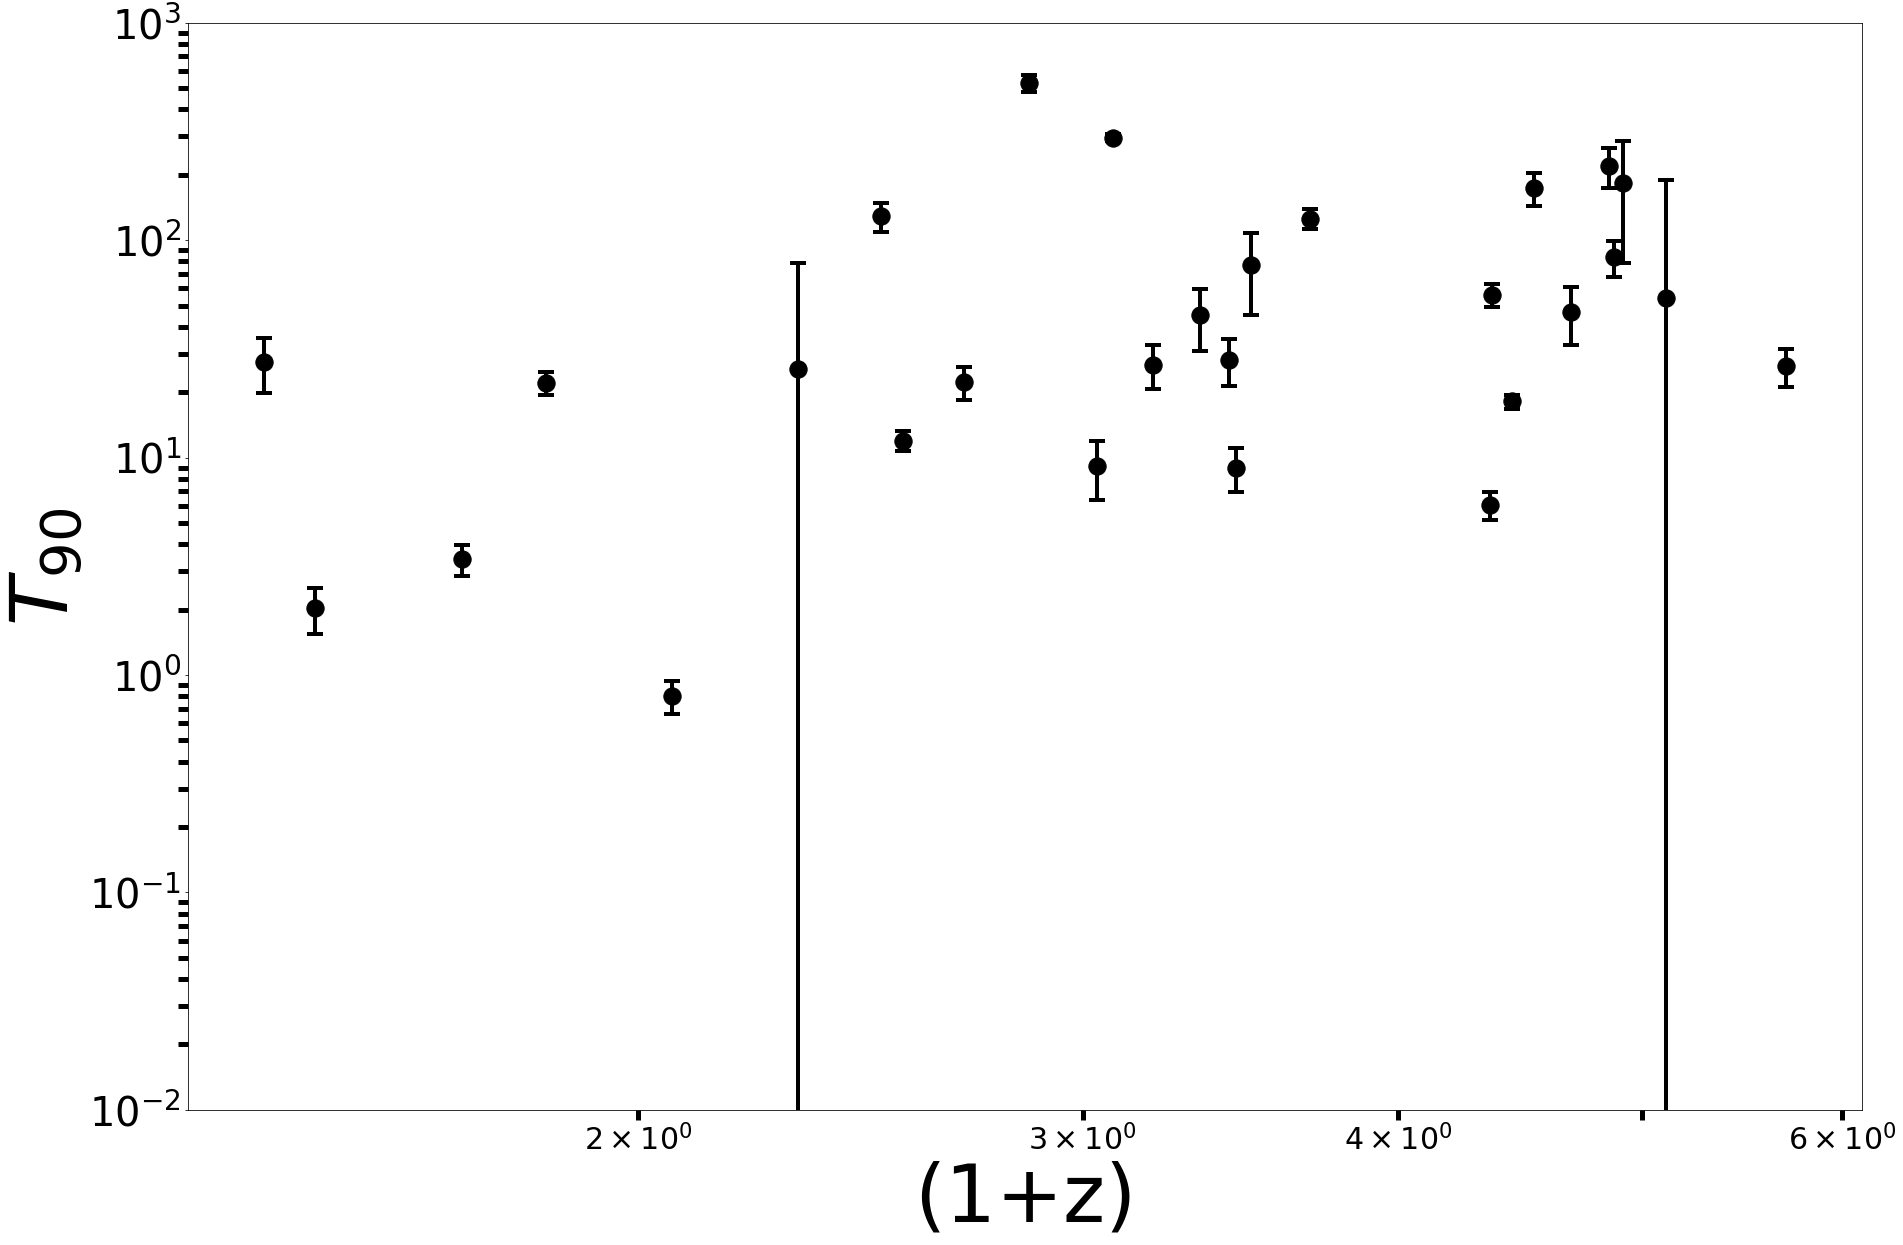

In [56]:
#Now comes the real plotting

#T90
plt.errorbar(x,y_T90x_raw,yerr=y_T90x_raw_error,fmt='.k',elinewidth=4,capsize=8,capthick=4)
plt.scatter(x, y_T90x_raw, s = 300,c='black')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('(1+z)')
plt.ylabel('$T_{90}$',fontweight='bold')


plt.ylim([0.01,1000])
#plt.xlim([1,10])
plt.savefig('T90_raw_upon_(1+z).pdf')


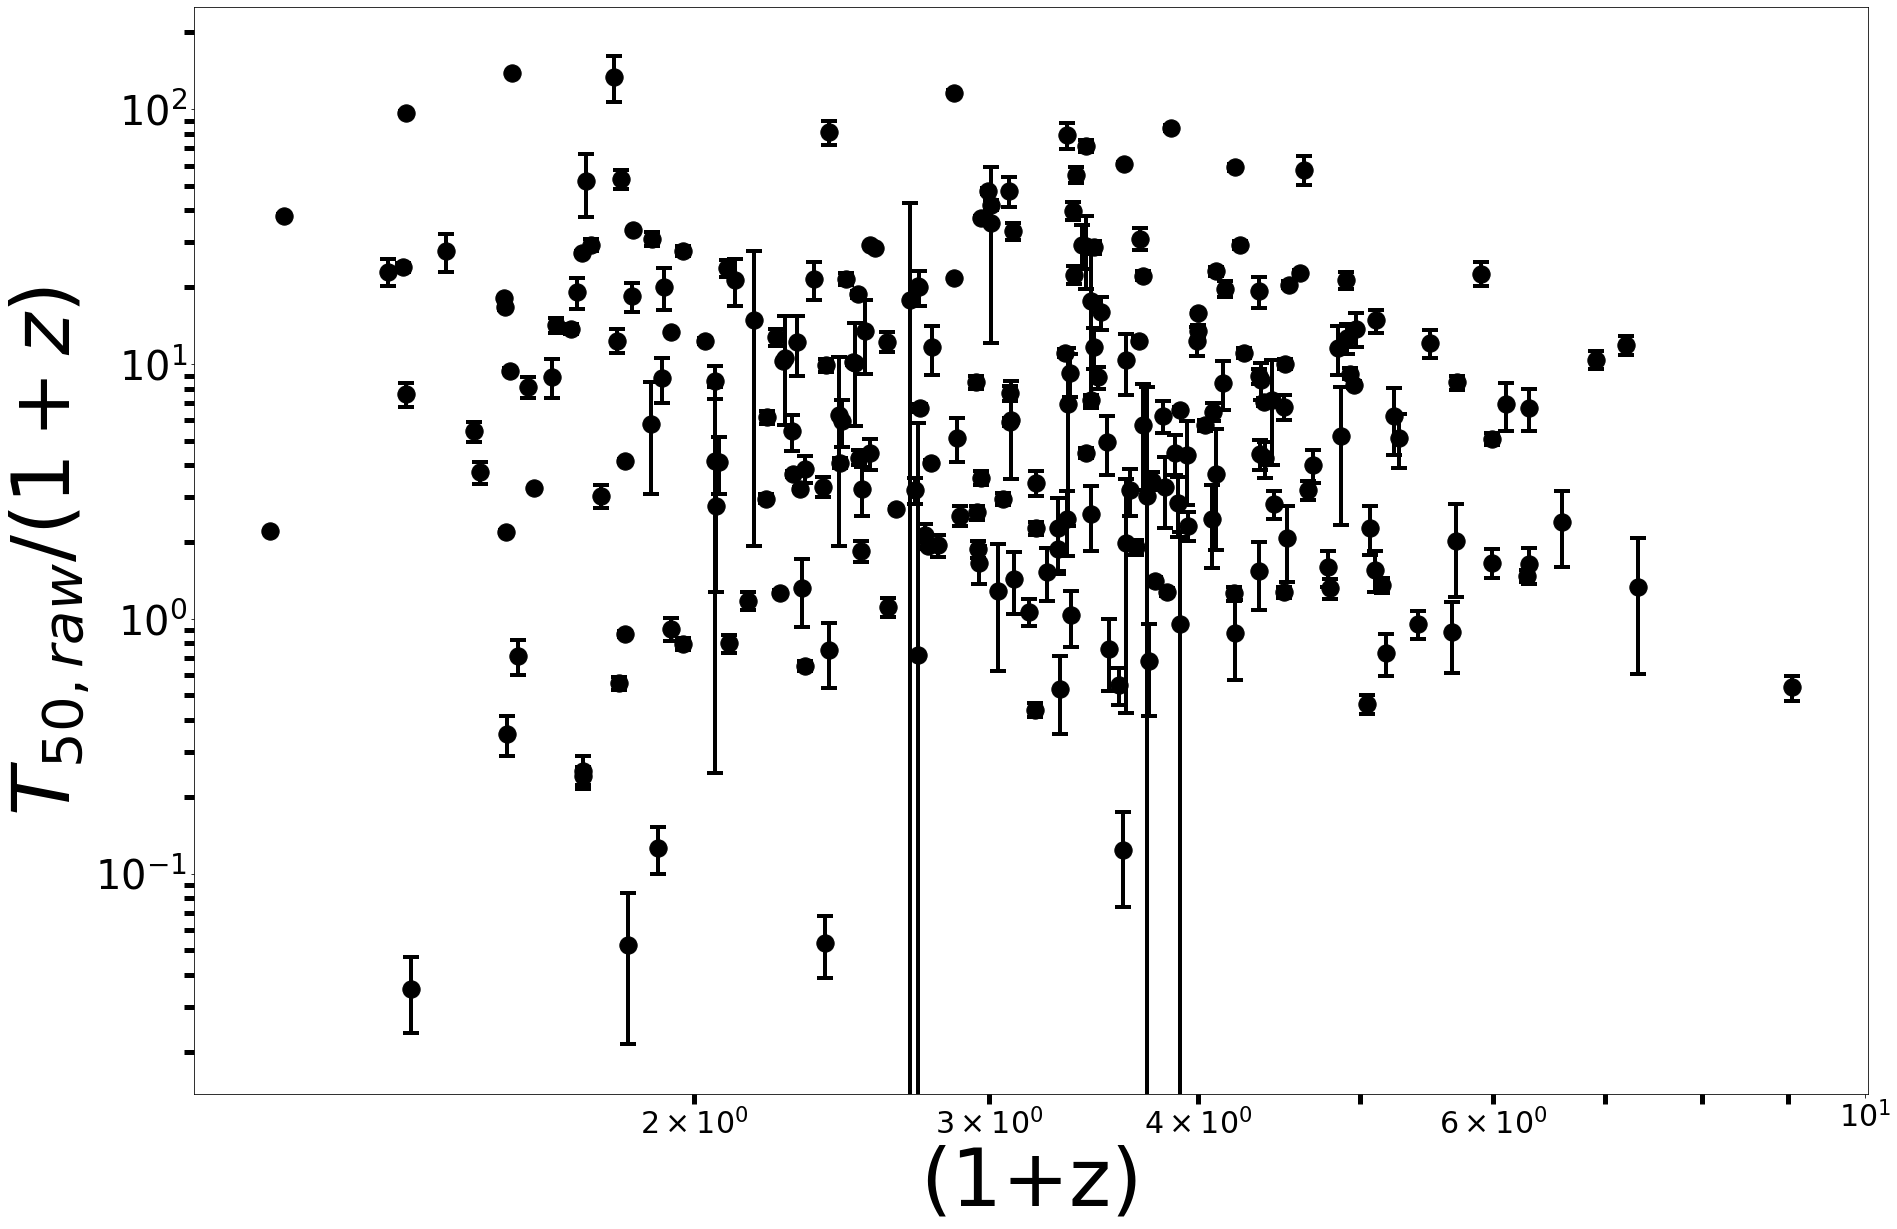

In [71]:
#T50
plt.errorbar(x,y_T50x_raw,yerr=y_T50x_raw_error,fmt='.k',elinewidth=4,capsize=8,capthick=4)
plt.scatter(x, y_T50x_raw, s = 300,c='black')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('(1+z)')
plt.ylabel('$T_{50,raw}/(1+z)$',fontweight='bold')


#plt.ylim([0.01,1000])
#plt.xlim([1,10])
plt.savefig('T50_raw_upon_(1+z).pdf')

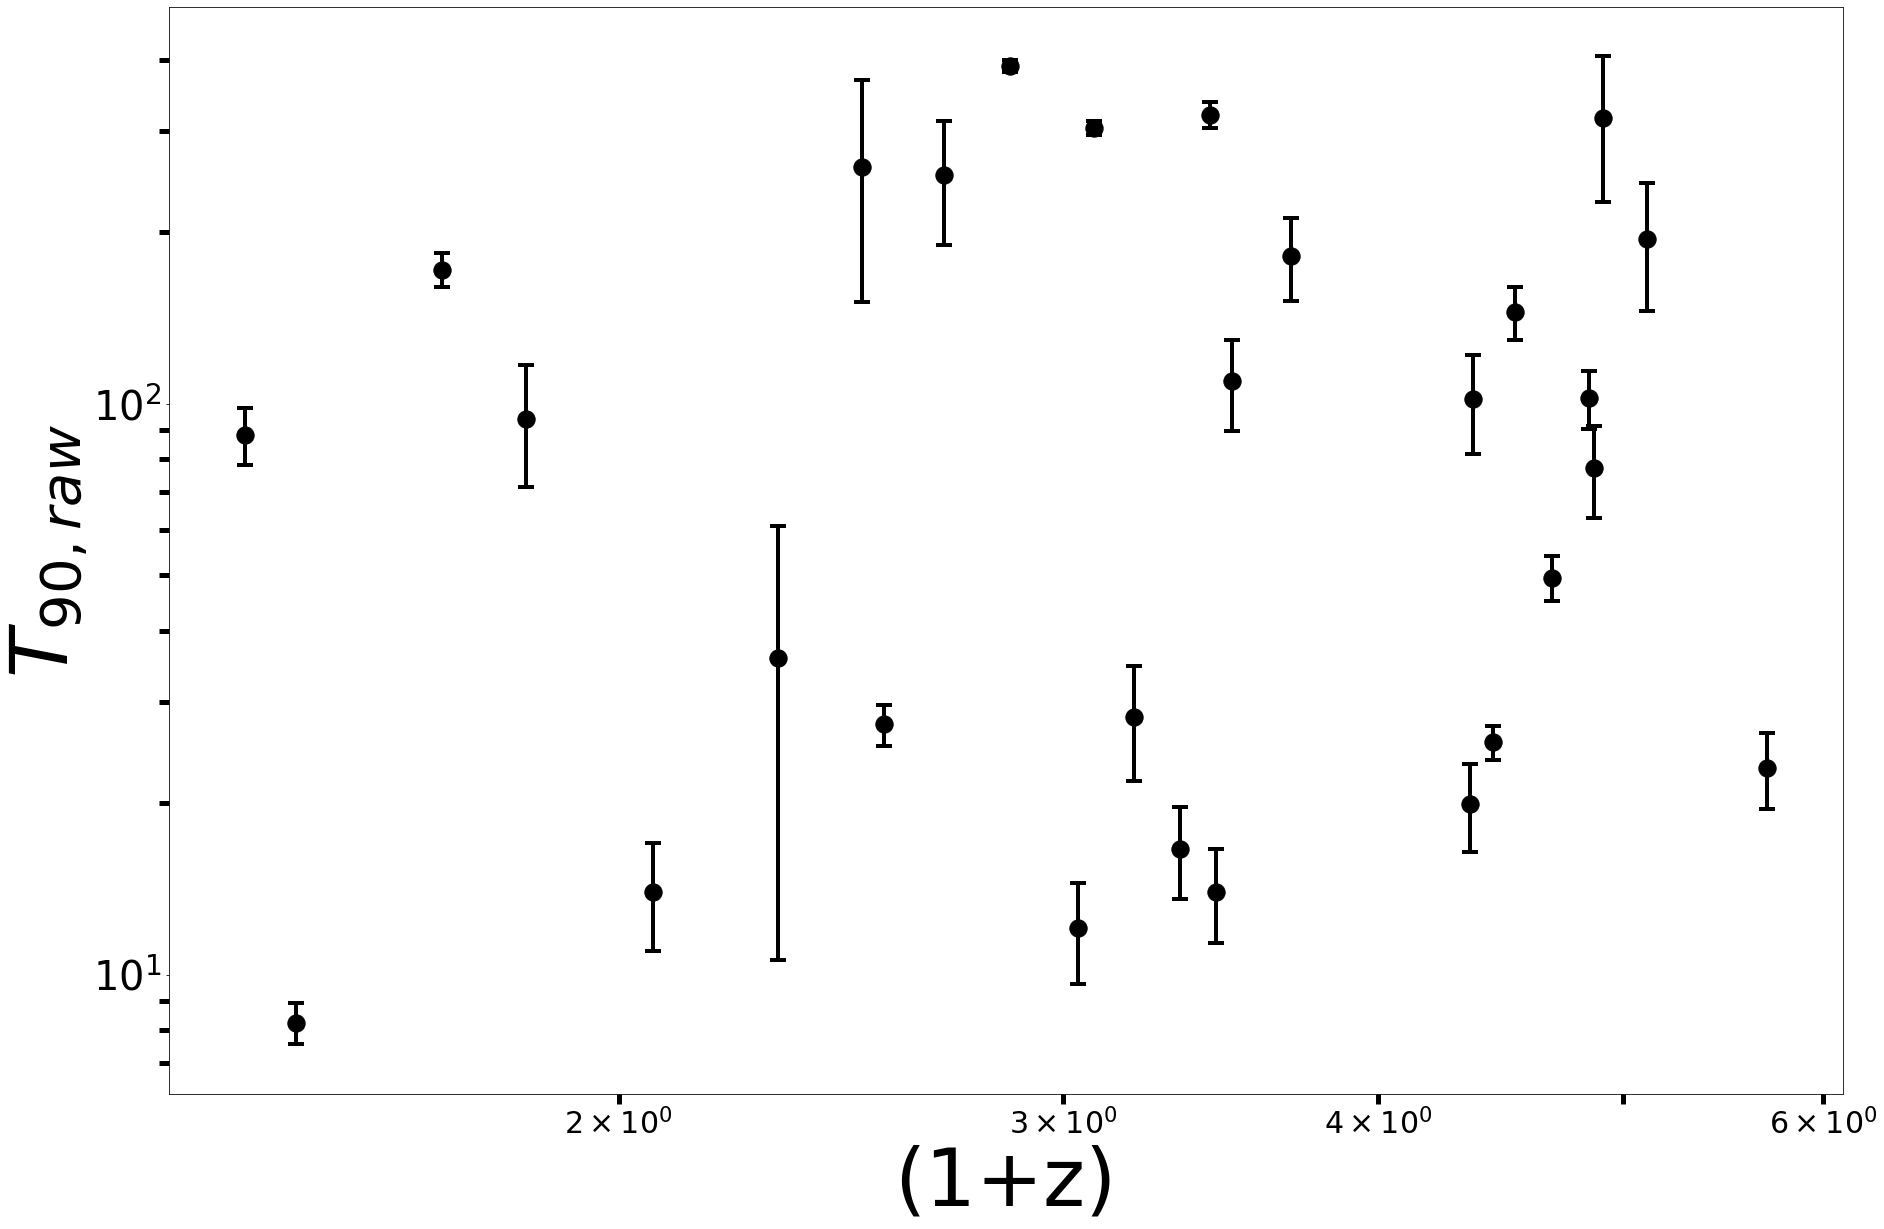

In [58]:
#T90_rest

plt.errorbar(x,y_T90_rest,yerr=y_T90_rest_error,fmt='.k',elinewidth=4,capsize=8,capthick=4)
plt.scatter(x, y_T90_rest, s = 300,c='black')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('(1+z)')
plt.ylabel('$T_{90,raw}$',fontweight='bold')


#plt.ylim([0.01,1000])
#plt.xlim([1,10])
plt.savefig('T90_rest.pdf')

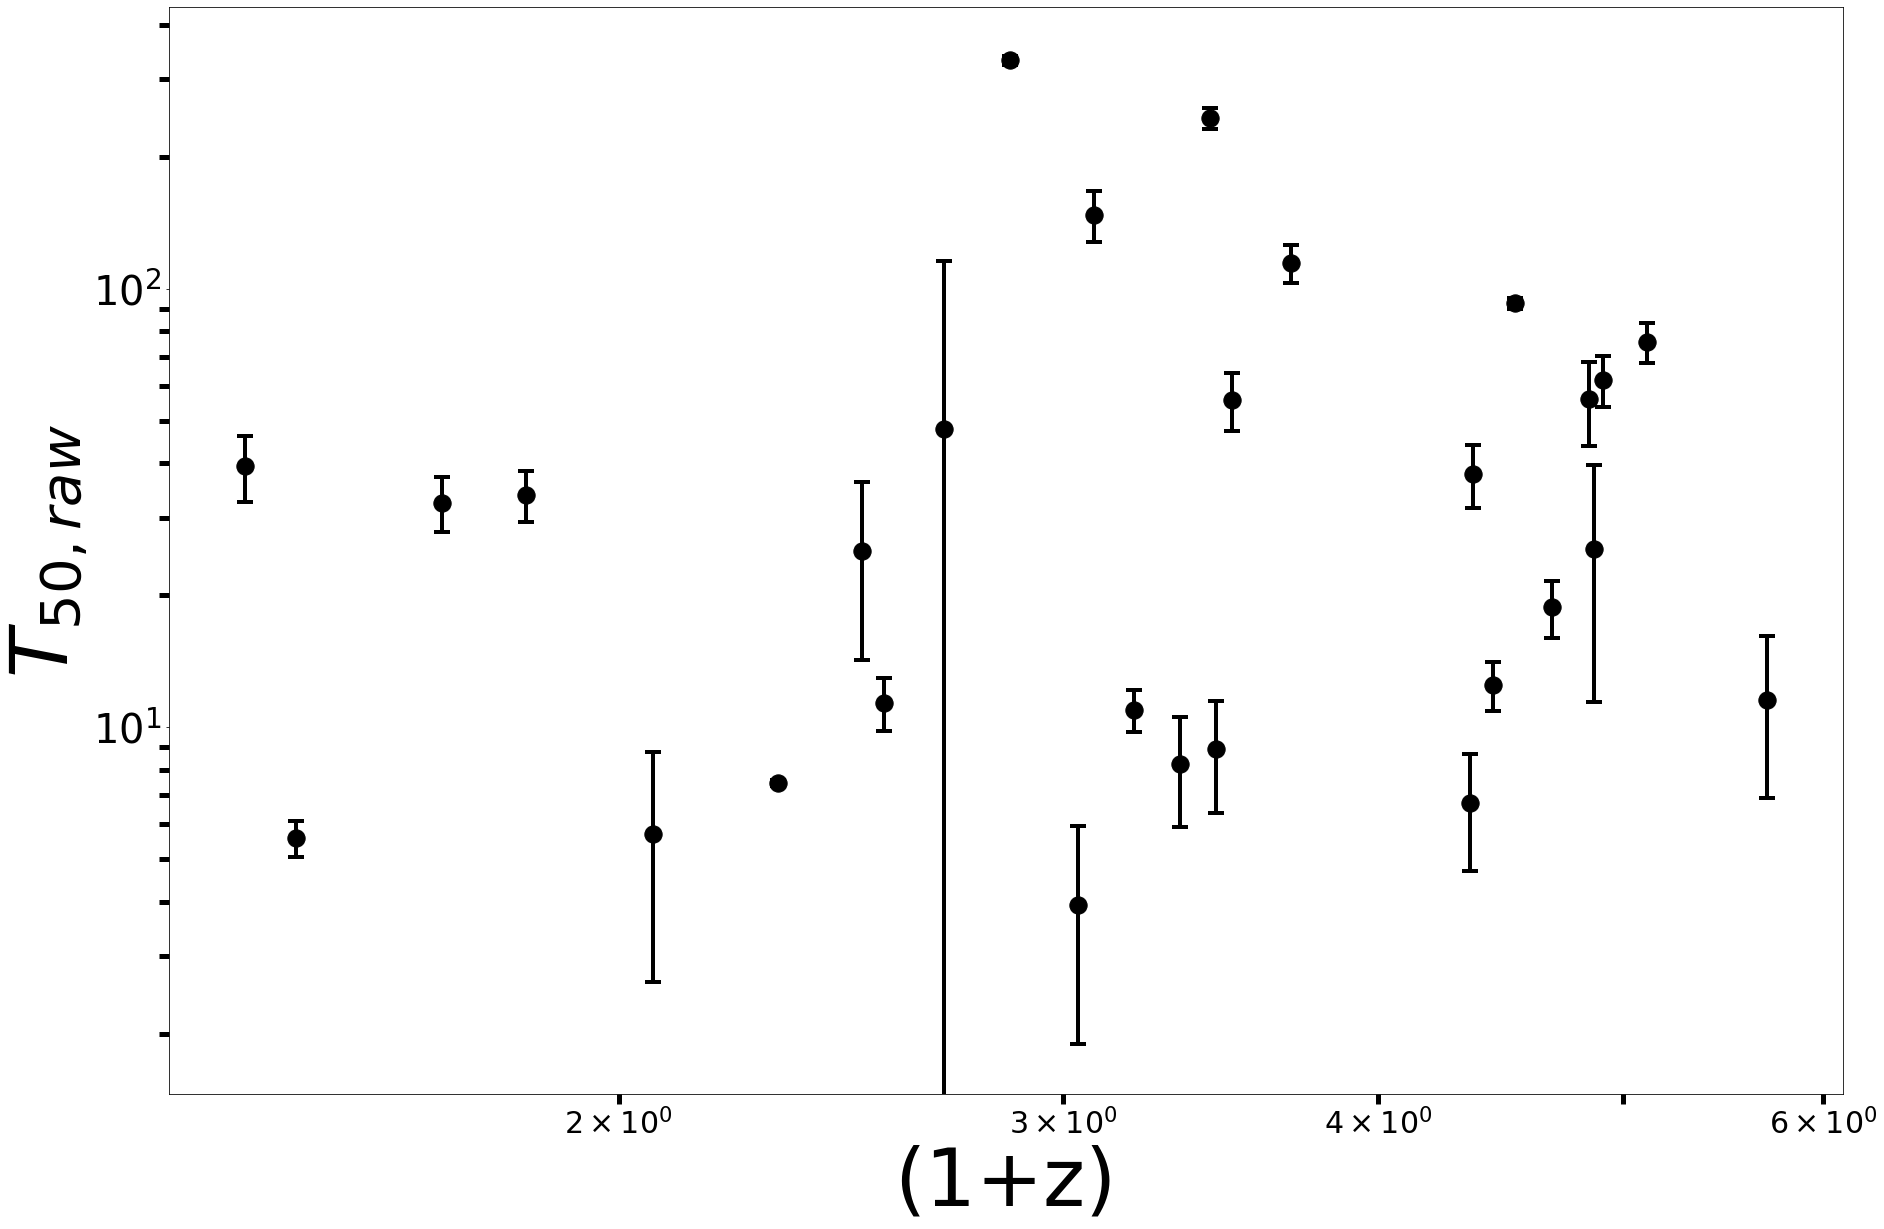

In [59]:
#T50_rest

plt.errorbar(x,y_T50_rest,yerr=y_T50_rest_error,fmt='.k',elinewidth=4,capsize=8,capthick=4)
plt.scatter(x, y_t50_raw, s = 300,c='black')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('(1+z)')
plt.ylabel('$T_{50,raw}$',fontweight='bold')


#plt.ylim([0.01,1000])
#plt.ylim([0.001,1000])
plt.savefig('T50_rest.pdf')